# CODE APRIL
CODE APRIL was an initiative that brought people of different backgrounds and coding level together to partake in a 30-day coding challenge.

For each day, there were resources to study and tasks to complete. To mark the end of the challenge, participants were instructed to pick from two datasets and explore them with certain objectives in mind.

As one of the participants, I chose the [Airline Dataset Analysis](https://www.kaggle.com/datasets/iamsouravbanerjee/airline-dataset) project and got to work.

Here is my notebook submission, but first, below are the objectives:

# OBJECTIVES
1.   Explore flight patterns, passenger demographics, and performance metrics.
2.   Discover insights that could influence airline operations and customer experiences.

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [68]:
df = pd.read_csv("/content/drive/MyDrive/Airline Dataset Updated - v2.csv")
df.head()

,Passenger ID,First Name,Last Name,Gender,Age,Nationality,Airport Name,Airport Country Code,Country Name,Airport Continent,Continents,Departure Date,Arrival Airport,Pilot Name,Flight Status
0,ABVWIg,Edithe,Leggis,Female,62,Japan,Coldfoot Airport,US,United States,NAM,North America,6/28/2022,CXF,Fransisco Hazeldine,On Time
1,jkXXAX,Elwood,Catt,Male,62,Nicaragua,Kugluktuk Airport,CA,Canada,NAM,North America,12/26/2022,YCO,Marla Parsonage,On Time
2,CdUz2g,Darby,Felgate,Male,67,Russia,Grenoble-Isère Airport,FR,France,EU,Europe,1/18/2022,GNB,Rhonda Amber,On Time
3,BRS38V,Dominica,Pyle,Female,71,China,Ottawa / Gatineau Airport,CA,Canada,NAM,North America,9/16/2022,YND,Kacie Commucci,Delayed
4,9kvTLo,Bay,Pencost,Male,21,China,Gillespie Field,US,United States,NAM,North America,2/25/2022,SEE,Ebonee Tree,On Time


In [69]:
# before cleaning and analysis
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98619 entries, 0 to 98618
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Passenger ID          98619 non-null  object
 1   First Name            98619 non-null  object
 2   Last Name             98619 non-null  object
 3   Gender                98619 non-null  object
 4   Age                   98619 non-null  int64 
 5   Nationality           98619 non-null  object
 6   Airport Name          98619 non-null  object
 7   Airport Country Code  98619 non-null  object
 8   Country Name          98619 non-null  object
 9   Airport Continent     98619 non-null  object
 10  Continents            98619 non-null  object
 11  Departure Date        98619 non-null  object
 12  Arrival Airport       98619 non-null  object
 13  Pilot Name            98619 non-null  object
 14  Flight Status         98619 non-null  object
dtypes: int64(1), object(14)
memory usage

In [70]:
# Cleaning the 'Departure Date' column: convert the 'date' column with custom format
# making the delimeter uniform
df['Departure Date'] = df['Departure Date'].str.replace('/', '-')
# converting the result to a datetime format
df['Departure Date'] = pd.to_datetime(df['Departure Date'], format='%m-%d-%Y', errors='coerce')
print("Earliest date: ", df['Departure Date'].min(), "\n", "Latest date: ", df['Departure Date'].max())

Earliest date:  2022-01-01 00:00:00 
 Latest date:  2022-12-30 00:00:00


**First Observation:**

This dataset presents information of passengers between January 2022 to December 2022. The date column was cleaned up in order to ascertain the time period of the data. Without the cleaning any minimum and maximum value obtained would have been reliable.

<ipython-input-81-7b2b22da9895>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


Youngest:  1 
 Oldest:  90


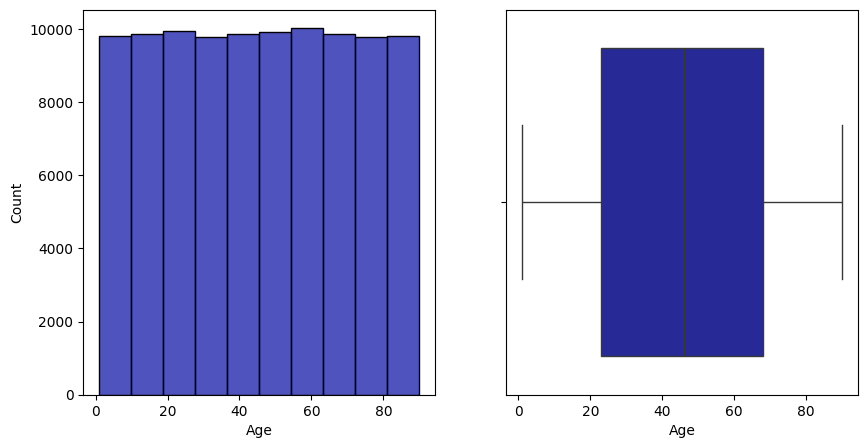

In [81]:
# studying the age and gender distribution to know what passenger we have
plt.subplots(figsize=(10,5));
plt.subplot(1,2,1)
sns.histplot(x="Age", data=df, bins=10, color='#1419a8');

plt.subplot(1,2,2)
sns.boxplot(x='Age', data=df, color='#1419a8');

print("Youngest: ", df['Age'].min(), "\n", "Oldest: ", df['Age'].max())

**Second Observation:**


*   The histogram shows an almost even distribution across all age ranges.
*   We have passengers as young as one (1) year and as old as ninety (90) years.
*   We have a mean age of around fifty (50) years.





<ipython-input-82-8d08167d4073>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,2,1)


US Airport Depature Pecentage:  22.413530861193077
Chinese Passenger Percentage:  18.573500035490117


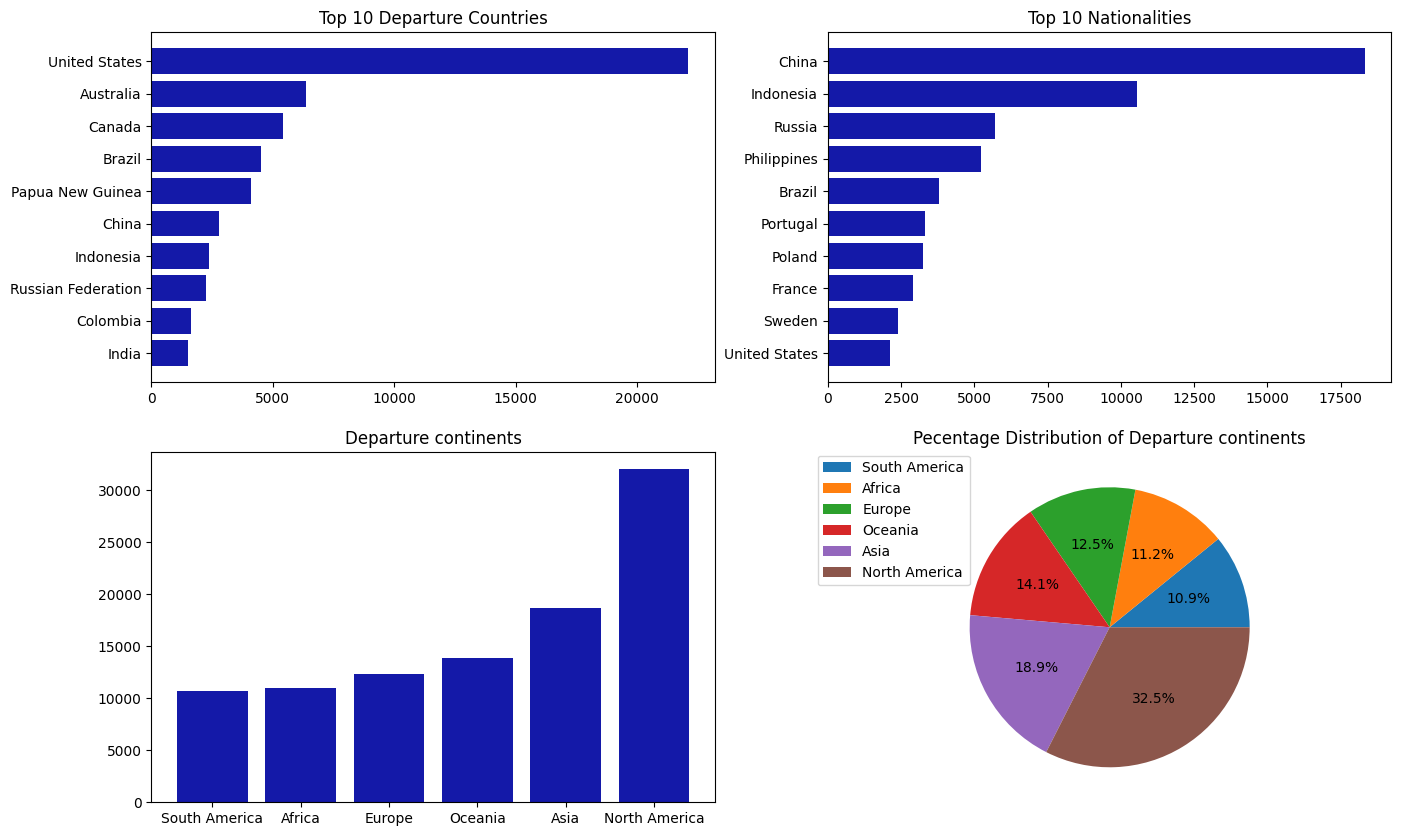

In [82]:
# Departure Country, Destinations and Nationals
plt.subplots(figsize=(16,10));

# Top 10 Country of Departure
plt.subplot(2,2,1)
top101 = df['Country Name'].value_counts(ascending=True).tail(10)
plt.barh(top101.index, top101.values, color='#1419a8')
plt.title("Top 10 Departure Countries");

# Top 10 Destination Country
plt.subplot(2,2,2)
top102 = df['Nationality'].value_counts(ascending=True).tail(10)
plt.barh(top102.index, top102.values, color='#1419a8')
plt.title("Top 10 Nationalities");

# pie chart of continents
plt.subplot(2,2,3)
piecont = df['Continents'].value_counts(ascending=True).tail(10)
plt.bar(piecont.index, piecont.values, color='#1419a8')
plt.title("Departure continents");

# pie chart of continents
plt.subplot(2,2,4)
piecont = df['Continents'].value_counts(ascending=True).tail(10)
plt.pie(piecont.values,autopct='%1.1f%%')
plt.legend(piecont.index, loc='lower right', bbox_to_anchor=(0.12, 0.60))
plt.title("Pecentage Distribution of Departure continents");

print("US Airport Depature Pecentage: ", top101.max()/len(df) *100)
print("Chinese Passenger Percentage: ", top102.max()/len(df)*100)

**Third Observation:**
*   **32.5%** of passengers proposed to departed from a North American airport. North America, followed by Asia (**18.9%**) boosts of the highest passenger departure compared to other continents.
*   With **10.9%** and **11.2%** respectively, South American and Africa are the continents having the least amount of passengers proposing to depart from their airports.
*   Based on the data, the Chinese (18.6%) are the most populous passengers followed by the Indonesians.
*   Most proposed Departure Country is the United States (22.4%), followed by Australia.





In [73]:
df['Flight Status'].unique()

#try hue by continent

array(['On Time', 'Delayed', 'Cancelled'], dtype=object)

**STUDY:**

There is a column in the dataset tagged **Flight Status**. This column has the following unique values: 'On Time', 'Delayed', 'Cancelled', as seen from the code above.

It becomes necessary to study trends and know why some flights were delayed, and in extreme cases, why they were cancelled. It will be interesting to know what trends accompanied flights that were on time. These answer will help improve performnce and consolidate strong areas.

In [74]:
# proportion of the different Flight Statuses
df['Flight Status'].value_counts(normalize =True)

Flight Status
Cancelled    0.334033
On Time      0.333060
Delayed      0.332907
Name: proportion, dtype: float64

**Fourth Observation**:
*   The three classes of Flight Statuses are almost evenly distributed.
*   However, it is a cause for concern that over sixty (60) percent of flights were either delayed or cancelled. This can be simplified by saying that at least six (6) in every ten (10) flights either suffered delay or cancellation.





0.22282699587976829


Gender
Male      0.502182
Female    0.497818
Name: proportion, dtype: float64

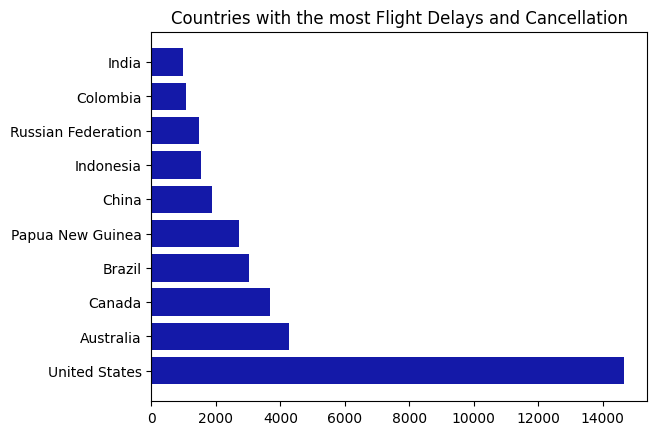

In [84]:
# taking a look at Departure Countries with the top 10 number of delayed or cancelled flights

scat = df.loc[(df['Flight Status'] != 'On Time'), ['Country Name', 'Gender', 'Continents']]
plt.barh(scat['Country Name'].value_counts().head(10).index, scat['Country Name'].value_counts().head(10).values, color='#1419a8')
plt.title('Countries with the most Flight Delays and Cancellation');
print(scat['Country Name'].value_counts().max()/len(scat))
scat['Gender'].value_counts(normalize=True)

**Fifth Obsevation:**
*   Again, as with the others, the number of males and females that either had their flights delayed or cancelled appears to be evenly distributed.
*   Unsurprisingly, the United States tops departure countries with the most delays or cancellations. The United States accounts for about **22%**.

It only makes sense that the United states tops in this regard since the country topped the passenger proposed departure country by an incredible margin. A country with that many departres will most likely have the most delays and cancellation.

The male-female ratio does not tell much. There is no evidence that a lot of a particular gender flights were getting delayed or cancelled.



<ipython-input-83-7f61dfae1d98>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


Largest nationality:  0.1852583887005306
Largest Continent:  0.32519422863485015
Second largest Continent:  0.18845118817751966


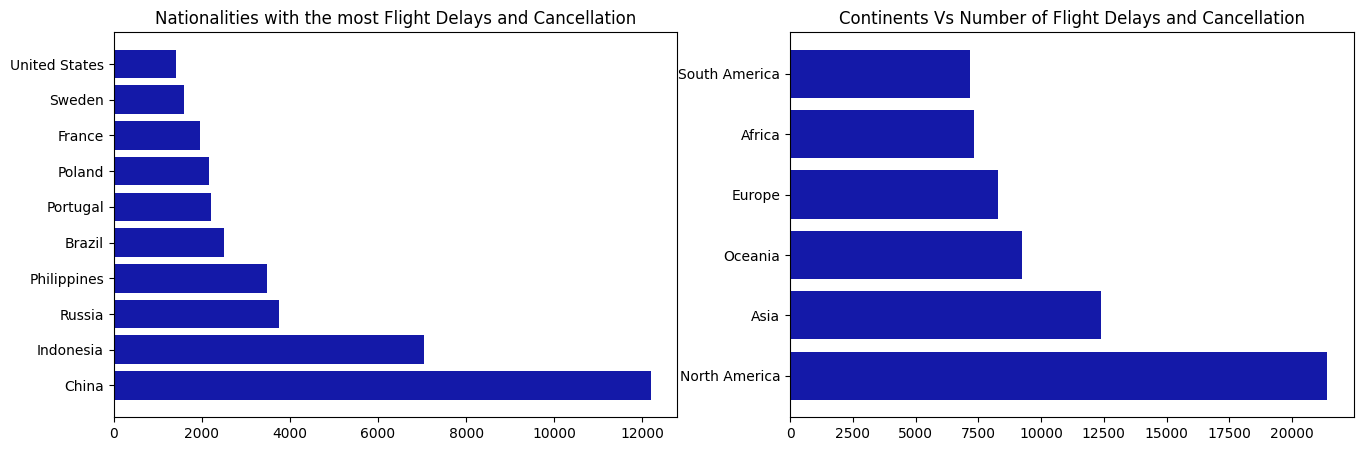

In [83]:
# a look at nationality and flight status
scat1 = df.loc[(df['Flight Status'] != 'On Time'), ['Nationality', 'Continents']]
plt.subplots(figsize=(16,5))
plt.subplot(1,2,1)
plt.barh(scat1['Nationality'].value_counts().head(10).index, scat1['Nationality'].value_counts().head(10).values, color='#1419a8')
plt.title('Nationalities with the most Flight Delays and Cancellation');
print("Largest nationality: ", scat1['Nationality'].value_counts().max()/len(scat1))
# scat['Gender'].value_counts(normalize=True)

#scat1 = df.loc[(df['Flight Status'] != 'On Time'), ['Nationality', 'Continents']]
plt.subplot(1,2,2)
plt.barh(scat1['Continents'].value_counts().index, scat1['Continents'].value_counts().values, color='#1419a8')
plt.title('Continents Vs Number of Flight Delays and Cancellation');
print("Largest Continent: ", scat1['Continents'].value_counts().max()/len(scat1))
print("Second largest Continent: ", scat['Continents'].value_counts().nlargest(2)[1]/len(scat))

**Sixth Observation:**

* Here, China ranks as the country whose citizens had the most delays or cancellation, constituting about **18%**.
*   The continents of North America and Asia combined, accounts for over fifty (50) percent of delays and cancellations among other continents.



In [77]:
# further inspection on the age column

# categorizing age based on:
# 0–1 years for infant,
# 2–4 years for toddler,
# 5–12 years for child,
# 13–19 years for teen,
# 20–39 years for adult,
# 40–59 years for middle age adult,
# and 60+ for senior adult
df['Age Group'] = pd.cut(df['Age'], bins=[0,2,5,13,20,40,60,91], labels=['Infant', 'Toddler', 'Child', 'Teen', 'Adult', 'Middle Age Adult', 'Senior Adult'], right=False)
df.head(5)

,Passenger ID,First Name,Last Name,Gender,Age,Nationality,Airport Name,Airport Country Code,Country Name,Airport Continent,Continents,Departure Date,Arrival Airport,Pilot Name,Flight Status,Age Group
0,ABVWIg,Edithe,Leggis,Female,62,Japan,Coldfoot Airport,US,United States,NAM,North America,2022-06-28,CXF,Fransisco Hazeldine,On Time,Senior Adult
1,jkXXAX,Elwood,Catt,Male,62,Nicaragua,Kugluktuk Airport,CA,Canada,NAM,North America,2022-12-26,YCO,Marla Parsonage,On Time,Senior Adult
2,CdUz2g,Darby,Felgate,Male,67,Russia,Grenoble-Isère Airport,FR,France,EU,Europe,2022-01-18,GNB,Rhonda Amber,On Time,Senior Adult
3,BRS38V,Dominica,Pyle,Female,71,China,Ottawa / Gatineau Airport,CA,Canada,NAM,North America,2022-09-16,YND,Kacie Commucci,Delayed,Senior Adult
4,9kvTLo,Bay,Pencost,Male,21,China,Gillespie Field,US,United States,NAM,North America,2022-02-25,SEE,Ebonee Tree,On Time,Adult


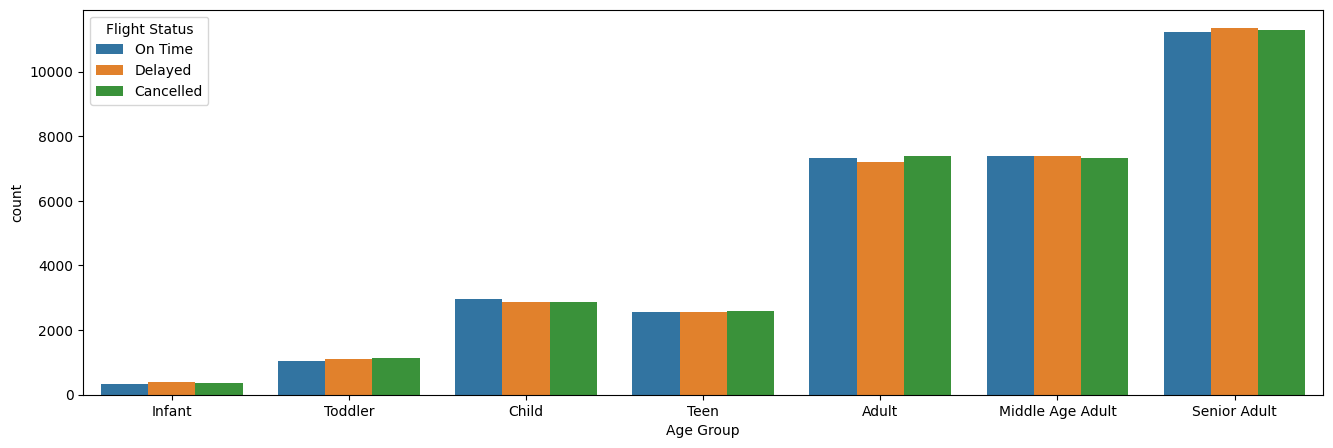

In [78]:
plt.subplots(figsize=(16,5))
sns.countplot(data=df, x='Age Group', hue='Flight Status');

**Seventh Observation:**

*   We can see that even across age groups, the flight statuses of passengers are evenly distributed.
*   Not only that passengers above 60 (Senior Adults) are more in number, they also had the highest flight delays and cancellation.



In [79]:
# after cleaning and analysis
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98619 entries, 0 to 98618
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Passenger ID          98619 non-null  object        
 1   First Name            98619 non-null  object        
 2   Last Name             98619 non-null  object        
 3   Gender                98619 non-null  object        
 4   Age                   98619 non-null  int64         
 5   Nationality           98619 non-null  object        
 6   Airport Name          98619 non-null  object        
 7   Airport Country Code  98619 non-null  object        
 8   Country Name          98619 non-null  object        
 9   Airport Continent     98619 non-null  object        
 10  Continents            98619 non-null  object        
 11  Departure Date        98619 non-null  datetime64[ns]
 12  Arrival Airport       98619 non-null  object        
 13  Pilot Name      

**Conclusion:**

From the above, it is clear that based on performance, the airport authorities have to do more. How can a whooping 60% of total proposed fligts either end up delayed or cancellled?

If the authorities in North America and Asia can address reasons why their airports account for over 50% of delays and cancellation, that will go a long way to nip this problem in the bud.

The authorities can start by answering the following questions:


1.   Are there peculiarities surounding passengers over 60 which results in their flight been delayed or cancelled?
2.   Are there issues been overlooked by authorities in United States airports resulting in such a high percentage of delays or cancellation?
3. What are the cicumstances that made that many Chinese citizens have delays and cancellations?



# Thank You!

I will like to thank the CODE APRIL team and my fellow paticipants. This challenge served as an awakening and I am appreciative of all those involved in putting it together.